# Model Training

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [64]:
SEED = 2024

## Load Data

In [65]:
data = pd.read_csv('landmarks.csv')
data.head()

,landmark_0,landmark_1,landmark_2,landmark_3,landmark_4,landmark_5,landmark_6,landmark_7,landmark_8,landmark_9,...,landmark_33,landmark_34,landmark_35,landmark_36,landmark_37,landmark_38,landmark_39,landmark_40,landmark_41,class
0,0.806592,0.529440,0.746876,0.503001,0.691475,0.437588,0.663279,0.360754,0.693977,0.305357,...,0.459857,0.846193,0.357213,0.824259,0.338214,0.820538,0.396247,0.821174,0.437598,A
1,0.806261,0.525747,0.747570,0.503434,0.691566,0.437737,0.665843,0.360872,0.693294,0.303945,...,0.457985,0.846099,0.352388,0.824571,0.337086,0.820062,0.397678,0.819128,0.440632,A
2,0.745926,0.507414,0.687411,0.483646,0.634025,0.420270,0.614138,0.351011,0.630655,0.304478,...,0.436190,0.779134,0.335463,0.748987,0.315675,0.748847,0.367828,0.755996,0.407902,A
3,0.669018,0.513194,0.610721,0.488194,0.557436,0.430410,0.536724,0.364592,0.552120,0.318213,...,0.440155,0.694554,0.347029,0.664682,0.331099,0.667890,0.379544,0.677622,0.409496,A
4,0.650643,0.516626,0.591830,0.494648,0.541120,0.433183,0.522941,0.365137,0.534008,0.319361,...,0.444077,0.678024,0.353423,0.650276,0.340857,0.651280,0.390946,0.658339,0.420002,A


In [66]:
label_encoder = LabelEncoder()
data['class'] = label_encoder.fit_transform(data['class'])

class_names = label_encoder.classes_

In [67]:
data.shape

(1400, 43)

In [68]:
target = data['class']
data = data.drop('class', axis=1)

## Train Test Split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(
    data, 
    target, 
    test_size=0.3, 
    random_state=SEED
)

In [70]:
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [71]:
X_train.shape, X_test.shape

((980, 42), (420, 42))

In [72]:
y_train.shape, y_test.shape

((980,), (420,))

## Model

In [73]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(28, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │         5,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 28)             │           924 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,660 (68.98 KB)

 Trainable params: 17,212 (67.23 KB)

 Non-trainable params: 448 (1.75 KB)

In [74]:
history = model.fit(
    X_train, 
    y_train_encoded, 
    epochs=50, 
    batch_size=32, 
    validation_split=0.2
)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.0550 - loss: 3.8188 - val_accuracy: 0.0510 - val_loss: 3.3317
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1233 - loss: 3.1069 - val_accuracy: 0.0510 - val_loss: 3.2794
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2429 - loss: 2.6901 - val_accuracy: 0.0408 - val_loss: 3.2409
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3128 - loss: 2.3458 - val_accuracy: 0.0816 - val_loss: 3.1971
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4186 - loss: 2.0954 - val_accuracy: 0.0612 - val_loss: 3.0874
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4887 - loss: 1.8180 - val_accuracy: 0.0663 - val_loss: 3.0593
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6064 - loss: 1.5780 - val_accuracy: 0.1684 - val_loss: 2.9823
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6062 - loss: 1.4490 - val_accuracy: 0.2245 - val_loss

In [76]:
model.save('asl_classifier_model.keras')

## Model Evaluation

In [78]:
from sklearn.metrics import classification_report

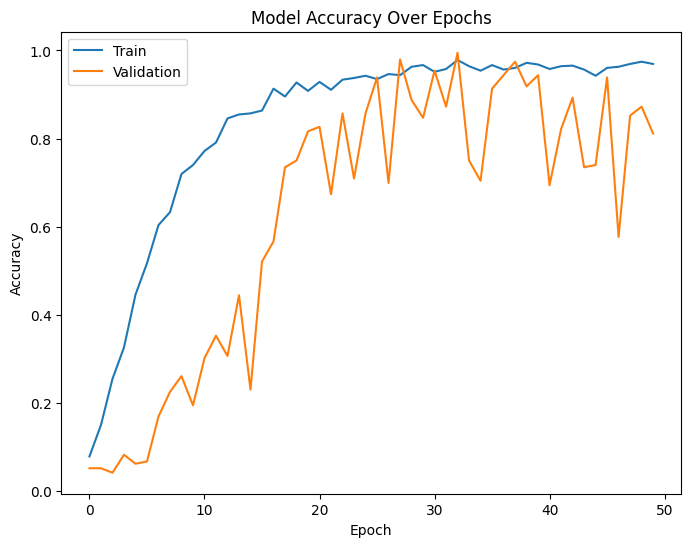

In [79]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy Over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

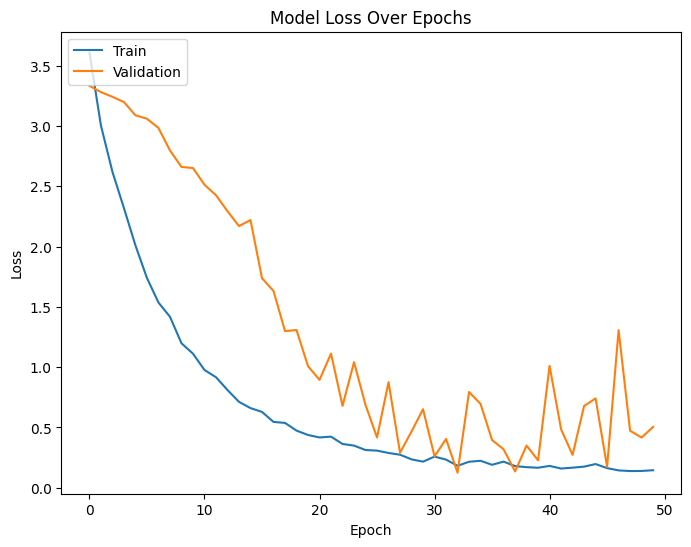

In [80]:
# Plot training & validation loss values
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

In [81]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7740 - loss: 0.5475
Test loss: 0.5455949902534485
Test accuracy: 0.7833333611488342


In [82]:
# Get predicted probabilities 
y_pred_prob = model.predict(X_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test_encoded, axis=1)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [83]:
print(classification_report(y_true, y_pred, target_names=class_names))

              precision    recall  f1-score   support

           A       0.41      1.00      0.58        15
           B       1.00      0.50      0.67        10
           C       0.00      0.00      0.00        18
           D       1.00      0.21      0.35        19
           E       0.82      0.60      0.69        15
           F       0.67      1.00      0.80        10
           G       1.00      1.00      1.00        12
           H       1.00      0.81      0.90        16
           I       1.00      1.00      1.00        17
           J       1.00      1.00      1.00        17
           K       1.00      1.00      1.00        14
           L       1.00      1.00      1.00        10
           M       1.00      0.50      0.67        14
           N       1.00      1.00      1.00        11
           O       0.45      1.00      0.62        15
           P       1.00      1.00      1.00        23
           Q       1.00      1.00      1.00        16
           R       1.00    

D:\UVG\DeepLearning\DL-ASL-Recognition\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\UVG\DeepLearning\DL-ASL-Recognition\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\UVG\DeepLearning\DL-ASL-Recognition\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

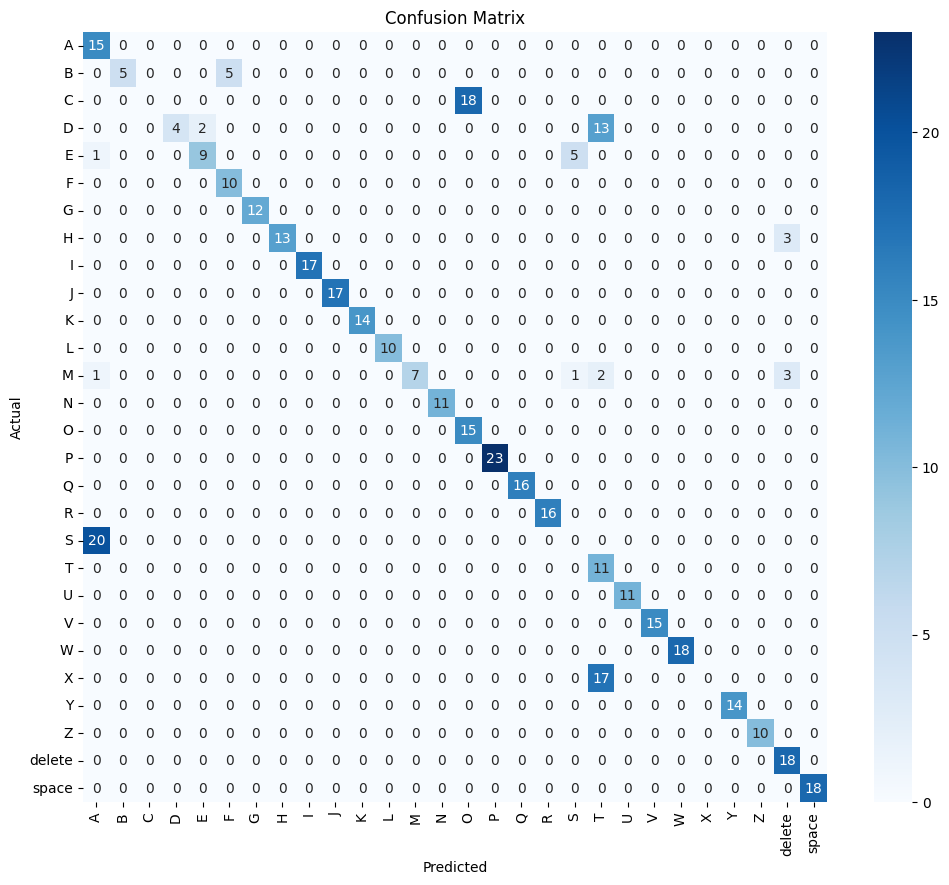

In [84]:
# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()